201951105
Nishant Andoriya

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
stocks=pd.read_csv("Stocks_pe.csv")
stocks

,Company Name,Index_type,Sector,Industry,Symbol,P/E,MarketCap
0,Reliance Industries Limited,Large,Energy,Oil & Gas Refining & Marketing,RELIANCE,27.617010,1.631686e+13
1,Tata Consultancy Services Limited,Large,Technology,Information Technology Services,TCS,37.613270,1.415626e+13
2,HDFC Bank Limited,Large,Financial Services,Banks—Regional,HDFCBANK,23.326649,8.380209e+12
3,Infosys Limited,Large,Technology,Information Technology Services,INFY,33.900620,7.280080e+12
4,Hindustan Unilever Limited,Large,Consumer Defensive,Household & Personal Products,HINDUNILVR,61.147617,5.356948e+12
...,...,...,...,...,...,...,...
1915,CKP Leisure Limited,None,Don't Know,Don't Know,CKPLEISURE,0.000000,0.000000e+00
1916,CKP Products Limited,None,Don't Know,Don't Know,CKPPRODUCT,0.000000,0.000000e+00
1917,Fourth Dimension Solutions Limited,None,Don't Know,Don't Know,FOURTHDIM,0.000000,0.000000e+00
1918,Artedz Fabs Limited,None,Don't Know,Don't Know,ARTEDZ,0.000000,0.000000e+00


In [4]:
stocks=stocks[(stocks["P/E"]!=0) & (stocks["MarketCap"]!=0)]
#stocks[stocks["MarketCap"].isnull()==True]
stocks.dropna(inplace=True)

d:\New folder\SEm6\sem6\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [3]:
print(stocks["MarketCap"].mean())
print(stocks["MarketCap"].median())

print(stocks["P/E"].mean())
print(stocks["P/E"].median())

123674921588.13452
3458972928.0
33.97890578725468
11.129046


<AxesSubplot:ylabel='P/E'>

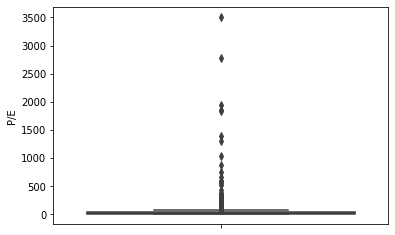

In [6]:
sns.boxplot(y=stocks["P/E"])

<AxesSubplot:xlabel='P/E', ylabel='Count'>

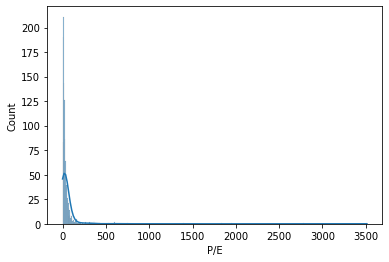

In [49]:
sns.histplot(stocks["P/E"],kde=True)

In [4]:
# Weights
stocks["wt"]=stocks["MarketCap"]/stocks["MarketCap"].sum()

In [5]:
#Weighted Mean
tmp=(stocks["P/E"]*stocks["wt"])/stocks["wt"].sum()
weighted_mean=tmp.sum()
weighted_mean

74.233311186291

In [52]:
# Weighted Median
sort_data = stocks.sort_values(by=["P/E"])

wgtsum=0
for idx, w in sort_data.iterrows():
    wgtsum+=w["wt"]
    if wgtsum>=0.5:
        weighted_median=w["P/E"]
        break
weighted_median

32.069355

In [53]:
# Trimmed Mean

trimmed_percentage=0.1
trim_num=math.floor(len(sort_data)*trimmed_percentage)
trim_mean=sort_data["P/E"].iloc[trim_num:len(sort_data)-trim_num].mean()
trim_mean

25.920835533568543

Estimates of Variability

In [6]:
#Standard Deviation
stocks["P/E"].std()

148.43935983865651

In [7]:
#Variance
stocks["P/E"].var()

22034.24354931015

In [8]:
#Mean abs Deviation
data1=stocks["P/E"]-stocks["P/E"].mean()
data2=data1.abs()
data2.mean()

40.20575853124191

In [57]:
#Median absolute Deviation from median
data1=stocks["P/E"]-stocks["P/E"].median()
data2=data1.abs()
data2.median()

11.5634205

In [58]:
#Range (Order Statistics)

print(sort_data['P/E'].iloc[-1],sort_data['P/E'].iloc[0])
print("Range =",sort_data['P/E'].iloc[-1]-sort_data['P/E'].iloc[0])

3512.5 0.019769566
Range = 3512.480230434


In [59]:
#Percentile (Order Statistics)

th=stocks["P/E"].quantile(0.5)
print(th)
print((stocks["P/E"]<th).sum())

20.721981
619


In [60]:
# Inter Quantile Range

IQR=stocks["P/E"].quantile(0.75)-stocks["P/E"].quantile(0.25)
IQR

28.5075825